<a href="https://colab.research.google.com/github/IT21174230/ML-Journey/blob/main/MLP_for_predicting_dealsize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
dataset='/content/Market_data_set.csv'

import pandas as pd

dataframe=pd.read_csv(dataset)

data=dataframe.head()
data

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,Product_SK,PRODUCTCODE,Customer_SK,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,Shipped,1,2,2003,Motorcycles,95,1,S10_1678,1,USA,Small
1,34,81.35,5,2765.90,Shipped,2,5,2003,Motorcycles,95,2,S10_1678,2,France,Small
2,41,94.74,2,3884.34,Shipped,3,7,2003,Motorcycles,95,3,S10_1678,3,France,Medium
3,45,83.26,6,3746.70,Shipped,3,8,2003,Motorcycles,95,4,S10_1678,4,USA,Medium
4,49,100.00,14,5205.27,Shipped,4,10,2003,Motorcycles,95,5,S10_1678,5,USA,Medium


preprocess data by removing unwanted values, converting ordinal to numerical, splitting to testing and training sets and one hot encoding values

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

dataframe['STATUS'].unique()
dataframe['STATUS']= label_encoder.fit_transform(dataframe['STATUS'])
dataframe['STATUS'].unique()



array([5, 1, 2, 0, 3, 4])

In [ ]:
dataframe['PRODUCTLINE'].unique()
dataframe['PRODUCTLINE']= label_encoder.fit_transform(dataframe['PRODUCTLINE'])
dataframe['PRODUCTLINE'].unique()

array([1, 0, 5, 6, 2, 3, 4])

In [ ]:
dataframe['DEALSIZE']=label_encoder.fit_transform(dataframe['DEALSIZE'])
dataframe['DEALSIZE'].unique()

array([2, 1, 0])

In [ ]:
X=dataframe.drop(columns=['DEALSIZE','PRODUCTCODE','Customer_SK','COUNTRY', 'ORDERLINENUMBER','Product_SK'])
y=dataframe['DEALSIZE']

X=X.to_numpy()
y=y.to_numpy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))

X=scaler.fit_transform(X)
print(X)

# y=y/2.0

# print(y)

from keras.utils import to_categorical
y= to_categorical(y, 3)

print(y)


[[0.26373626 0.94119256 0.17564355 ... 0.16666667 0.34254144 1.        ]
 [0.30769231 0.74493982 0.16791599 ... 0.16666667 0.34254144 1.        ]
 [0.38461538 0.92806346 0.25015018 ... 0.16666667 0.34254144 1.        ]
 ...
 [0.40659341 1.         0.36288212 ... 0.5        0.1160221  0.8       ]
 [0.30769231 0.48358862 0.12014335 ... 0.5        0.1160221  1.        ]
 [0.45054945 0.52844639 0.19096927 ... 0.5        0.1160221  0.6       ]]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2117, 10)
(706, 10)
(2117, 3)
(706, 3)


In [ ]:
print(y)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


creating a mlp

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential([
    Dense(64, input_shape=(10,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

optimization with hyperparameter (learning rate)

In [ ]:

from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history=model.fit(
    X_train,
    y_train,
    epochs=30,
    validation_data=(X_test, y_test)
)

Epoch 1/30
67/67 [==============================] - 1s 7ms/step - loss: 0.8269 - accuracy: 0.6117 - val_loss: 0.7699 - val_accuracy: 0.7351
Epoch 2/30
67/67 [==============================] - 0s 4ms/step - loss: 0.6538 - accuracy: 0.7685 - val_loss: 0.6430 - val_accuracy: 0.7507
Epoch 3/30
67/67 [==============================] - 0s 4ms/step - loss: 0.5359 - accuracy: 0.7870 - val_loss: 0.5359 - val_accuracy: 0.7776
Epoch 4/30
67/67 [==============================] - 0s 3ms/step - loss: 0.4528 - accuracy: 0.8096 - val_loss: 0.4299 - val_accuracy: 0.7989
Epoch 5/30
67/67 [==============================] - 0s 4ms/step - loss: 0.3746 - accuracy: 0.8413 - val_loss: 0.3530 - val_accuracy: 0.8385
Epoch 6/30
67/67 [==============================] - 0s 4ms/step - loss: 0.3101 - accuracy: 0.8810 - val_loss: 0.2865 - val_accuracy: 0.8839
Epoch 7/30
67/67 [==============================] - 0s 4ms/step - loss: 0.2603 - accuracy: 0.9079 - val_loss: 0.2351 - val_accuracy: 0.9221
Epoch 8/30
67/67 [==

validation accuracy

In [ ]:
test_loss, test_accuracy=model.evaluate(X_test, y_test)

print(f"Validation accuracy={test_accuracy}\nValidation loss={test_loss}")

23/23 [==============================] - 0s 3ms/step - loss: 0.0766 - accuracy: 0.9773
Validation accuracy=0.977337121963501
Validation loss=0.07658121734857559


graphing the metrics

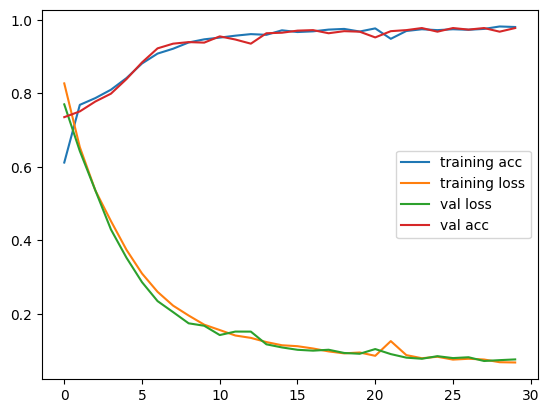

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='training acc')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 64)                704       
                                                                 
 dense_20 (Dense)            (None, 32)                2080      
                                                                 
 dense_21 (Dense)            (None, 3)                 99        
                                                                 
Total params: 2883 (11.26 KB)
Trainable params: 2883 (11.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
